### Time Series Data
Can get the data directly from

    1. Kaggle
    2. yFinance
        Python library which helps us to extract time series data realted to stocks
    3. Google Trend (https://trends.google.com)
        Website by Google that analyzes the popularity of top search queries in Google search across regions and languages

### References : 
    
    1. https://bookdown.org/gary_a_napier/time_series_lecture_notes/ChapterSix.html#general-problem
    2. Order Selection in ARIMA Models 
        https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/
    3. introduction to time series forecasting with python - Jason Brownee
     

In [1]:
!conda info


     active environment : new
    active env location : C:\Users\asus\anaconda3\envs\new
            shell level : 1
       user config file : C:\Users\asus\.condarc
 populated config files : C:\Users\asus\.condarc
          conda version : 4.10.1
    conda-build version : 3.21.4
         python version : 3.8.8.final.0
       virtual packages : __win=0=0
                          __archspec=1=x86_64
       base environment : C:\Users\asus\anaconda3  (writable)
      conda av data dir : C:\Users\asus\anaconda3\etc\conda
  conda av metadata url : https://repo.anaconda.com/pkgs/main
           channel URLs : https://repo.anaconda.com/pkgs/main/win-64
                          https://repo.anaconda.com/pkgs/main/noarch
                          https://repo.anaconda.com/pkgs/r/win-64
                          https://repo.anaconda.com/pkgs/r/noarch
                          https://repo.anaconda.com/pkgs/msys2/win-64
                          https://repo.anaconda.com/pkgs/msys2/noarch
  

In [2]:
import yfinance as yf

In [3]:
# time series data of Tesla
df = yf.download(tickers='TSLA', start='2019-01-01', end = '2019-12-31', progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,67.557999,67.842003,65.052002,66.559998,66.559998,31511500
2019-01-02,61.220001,63.026001,59.759998,62.023998,62.023998,58293000
2019-01-03,61.400002,61.880001,59.476002,60.071999,60.071999,34826000
2019-01-04,61.200001,63.599998,60.546001,63.537998,63.537998,36970500
2019-01-07,64.344002,67.348000,63.549999,66.991997,66.991997,37756000


In [4]:
# time series data of Facebook
df = yf.download(tickers='FB', start='2019-01-01', end = '2019-12-31', progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,134.449997,134.639999,129.949997,131.089996,131.089996,24625300
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300


In [5]:
# time series data of Amazon
df = yf.download(tickers='AMZN', start='2019-01-01', end = '2019-12-31', progress=False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-12-31,1510.800049,1520.760010,1487.000000,1501.969971,1501.969971,6954500
2019-01-02,1465.199951,1553.359985,1460.930054,1539.130005,1539.130005,7983100
2019-01-03,1520.010010,1538.000000,1497.109985,1500.280029,1500.280029,6975600
2019-01-04,1530.000000,1594.000000,1518.310059,1575.390015,1575.390015,9182600
2019-01-07,1602.310059,1634.560059,1589.189941,1629.510010,1629.510010,7993200


### Handling Missing Values in Time Series Data

    The dataset we are dealing with contains the number of customers in a shop from the year 1949 till 1960

In [6]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [7]:
#Reading the dataset

data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
##Convert the Date column to date-time format
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
# Set the column as index
data = data.set_index('Date')

data.shape

(144, 1)

In [8]:
data.head()

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0
1949-04-01,67.0
1949-05-01,123.0


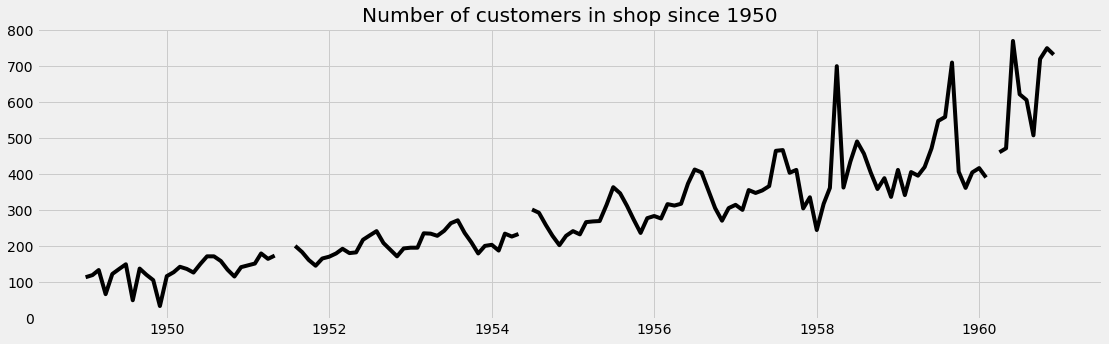

In [9]:
# Check for missing values using a line-chart
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data, color = 'black')
plt.title('Number of customers in shop since 1950')
plt.show()

The gaps indicate missing values in the dataset. The reasons for the same can be
    1. Shop was closed at that time
    2. There were entry related errors

## We have the following methods for treating missing values in the time series data.
1)	Mean Imputation
    
    Disadvantage
    
    - Distorts seasonality
    - Does not take into consideration the nature of the data

2)	Last Observation Carried forward

3)	Linear Interpolation

4)	Seasonal Interpolation


#### Mean Imputation

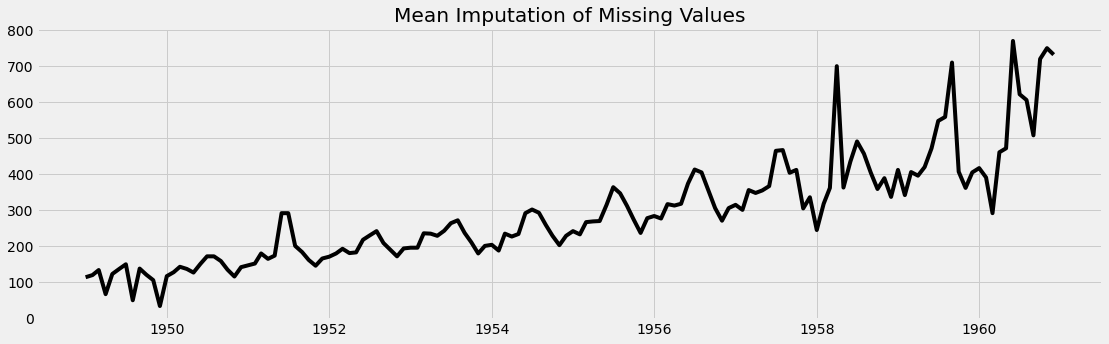

In [10]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'],color='black')
plt.title("Mean Imputation of Missing Values")
plt.show()

Observation : The missing value imputed for 1951 is higher than its surroundings, that's a problem

#### Last Observation Carried forward

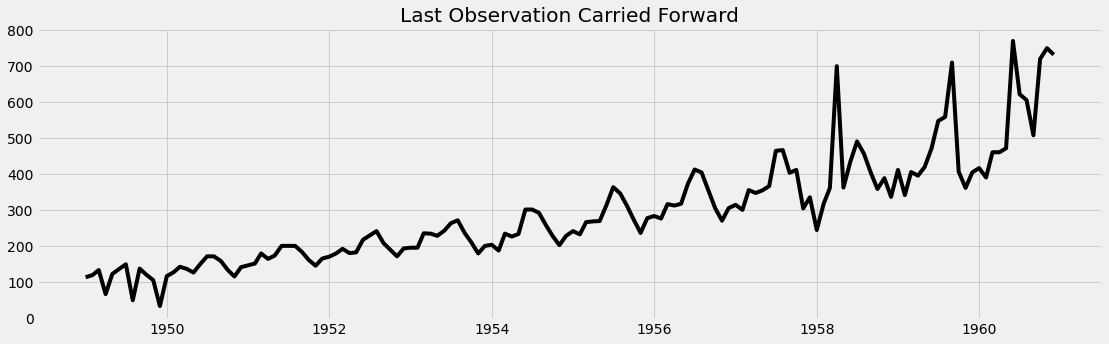

In [11]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_mean'] = data['Customers'].bfill()
plt.plot(data['Customers_mean'],color='black')
plt.title("Last Observation Carried Forward")
plt.show()

#### Linear Interpolation

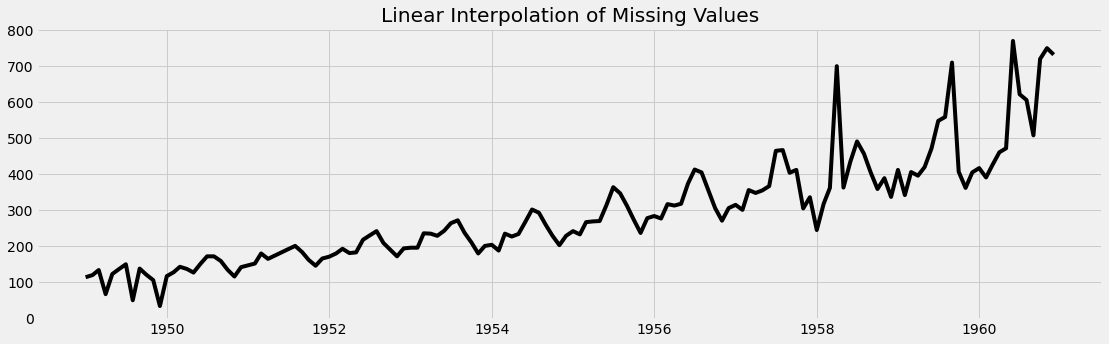

In [12]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()

#### Seasonal Interpolation

In [13]:
# lets find the dates where we have missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [14]:
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace=True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace=True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data.loc['1949-07':'1950-07':12].shape[0], inplace=True)
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace=True)

In [15]:
data.isnull().sum().sum()

0

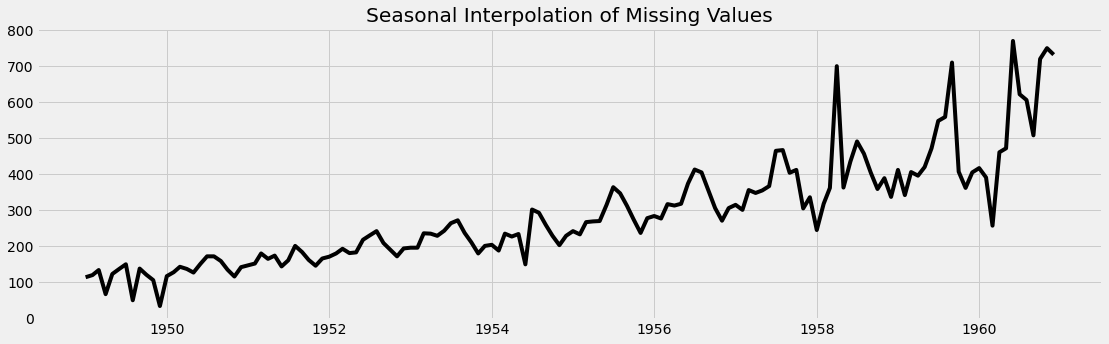

In [16]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers'],color='black')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

## Handling Outlier Values

Outliers : 
    
    Extreme values that fall a long way outside of other observations
    
Why Occur?

    1. Entry Errors
    2. Measurement/Dimesnsional Errors
    3. Naturally Occuring
    
Why Treat Outliers ?

    Feeding predictive model with outliers may result in biased results
    
How to Deal with Outliers

    Boxplot : Standardized way of displaying the distribution of data. Any data points which are less than Q1 - 1.5*IQR or greater than Q3 + 1.5*IQR

### Checking for Outliers

<AxesSubplot:xlabel='Customers_linear'>

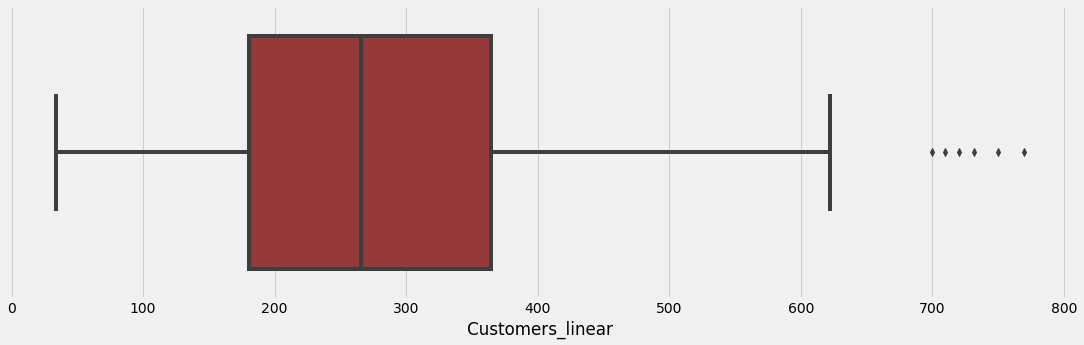

In [17]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color = 'brown')

### Handling Outliers

In [18]:
# outliers treatment

data['Customers_linear'].loc[(data['Customers_linear']>=700)] = 622
# lets also check the null values again
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_linear    0
dtype: int64

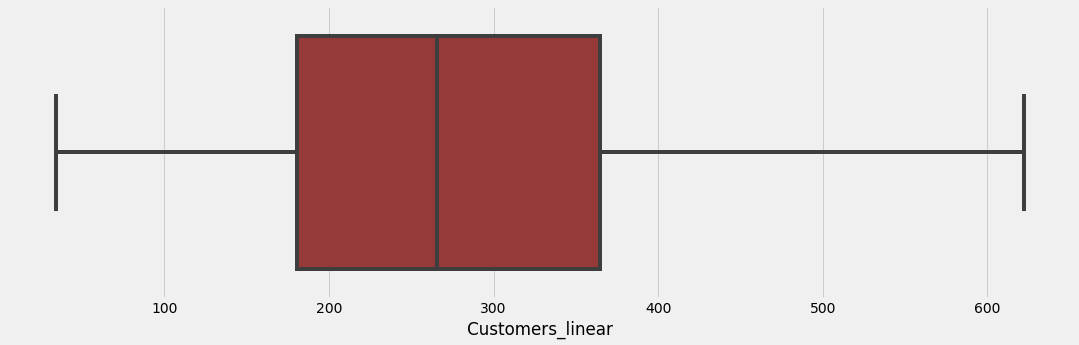

In [19]:
plt.rcParams['figure.figsize']=(17,5)
sns.boxplot(data['Customers_linear'], color='brown')
plt.show()

### Different components of Time Series :
1. Level
    - Level is the baseline for the entire time series. It is the average of the time series and the baseline to which we add different other components.
2. Trend
    - The indication of whther the time series has moved higher or lower over the time period
3. Seasonality
    - Pattern in time series which repeats after a fixed interval of time
4. Cyclicity
    - Cyclicity is the pattern in the time series which repeats itself after some interval of time but the interval of time is not fixed in the case of cyclicity unlike the seasonality    
5. Noise
    - Noise is the random variation in the time series. We can not use noise to forecast the future.
    - Noise is just random fluctuations in our data and does not have any Pattern

   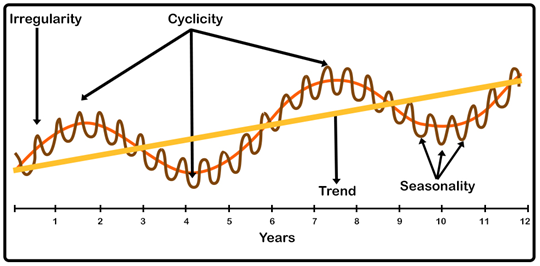

### Time Series Decomposition

    Time Series can be decomposed into different components which will help us better understand the time series
    
Why decompose ??
    
    Decomposing helps us find th underlying patterns in Time Series

#### Additive Seasonal decomposition

Additive Seasonal decomposition is when we add the individual components to get the time series data.

    y(t) = Level + Trend + Seasonality + Noise

#### Multiplicative Seasonal decomposition

Multiplicative Seasonal decomposition is when we multiply the individual components to get the time series data.

    y(t) = Level * Trend * Seasonality * Noise



   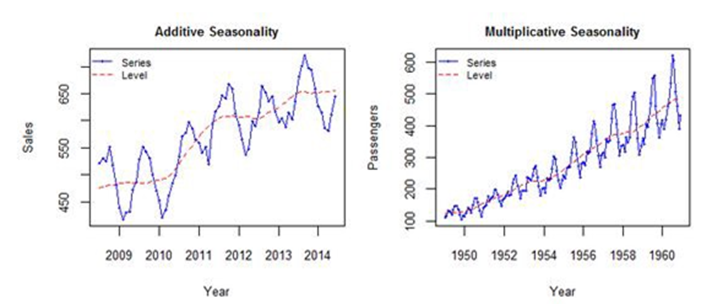

- We use additive model, the magnitude of seasonality does not change in relation to time.
- On the other hand, we use multiplicative models when the magnitude of the seasonal pattern in the data depends on the magnitude of the data. 


In [20]:
data.head()

,Customers,Customers_mean,Customers_linear
Date,,,
1949-01-01,114.0,114.0,114.0
1949-02-01,120.0,120.0,120.0
1949-03-01,134.0,134.0,134.0
1949-04-01,67.0,67.0,67.0
1949-05-01,123.0,123.0,123.0


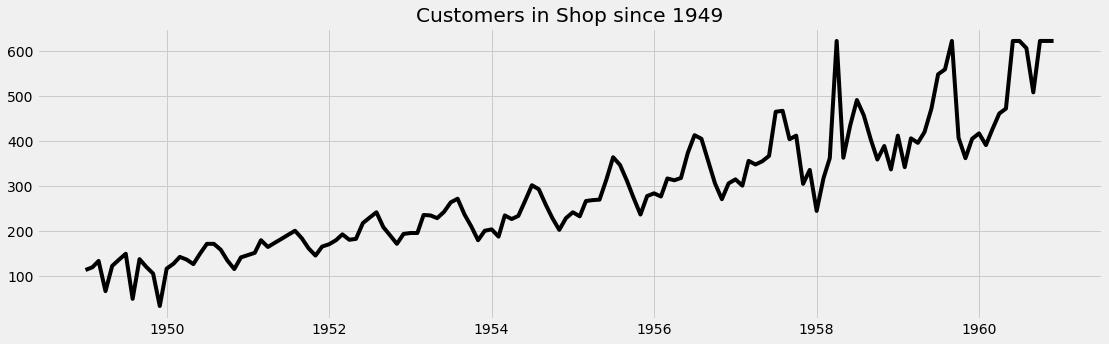

In [21]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['Customers_linear'],color='black')
plt.title("Customers in Shop since 1949")
plt.show()

The seasonal components are growing with increase in level of time, therefore we will use multiplicative seasonal decomposition.
But let's check for additive as well

#### Additive Seasonal Decomposition

In [22]:
import statsmodels.api as sm

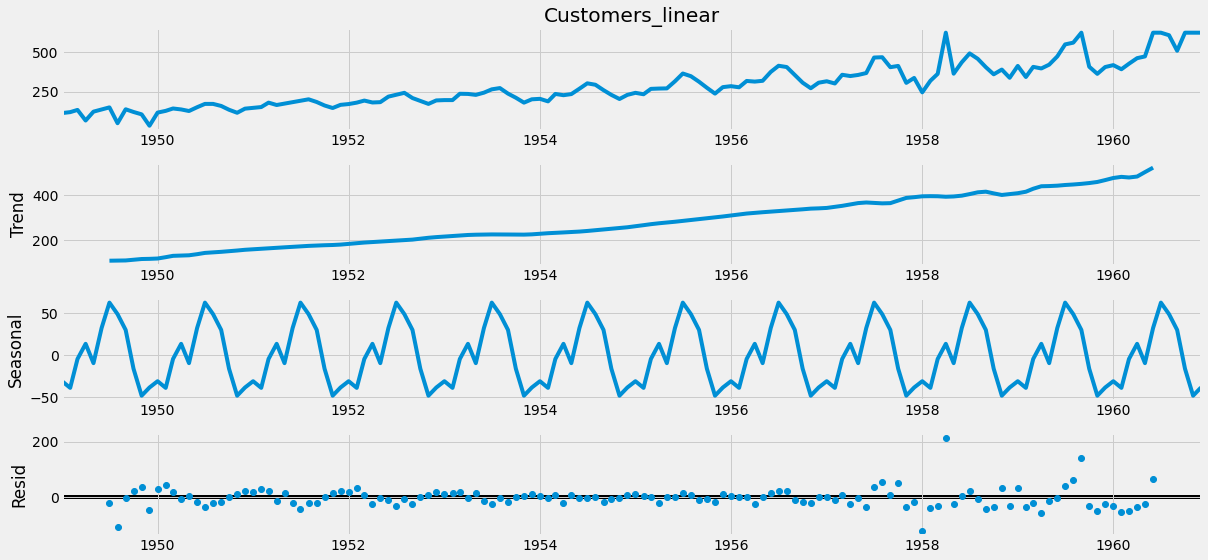

In [23]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='additive')
decomposition.plot()
                                          
plt.show()

Last plot represents the resideual, which is changing over period of time and has a pattern to it, therefore use different model as well

Residual

    The leftover part after extracting trend and seasonality from the time series

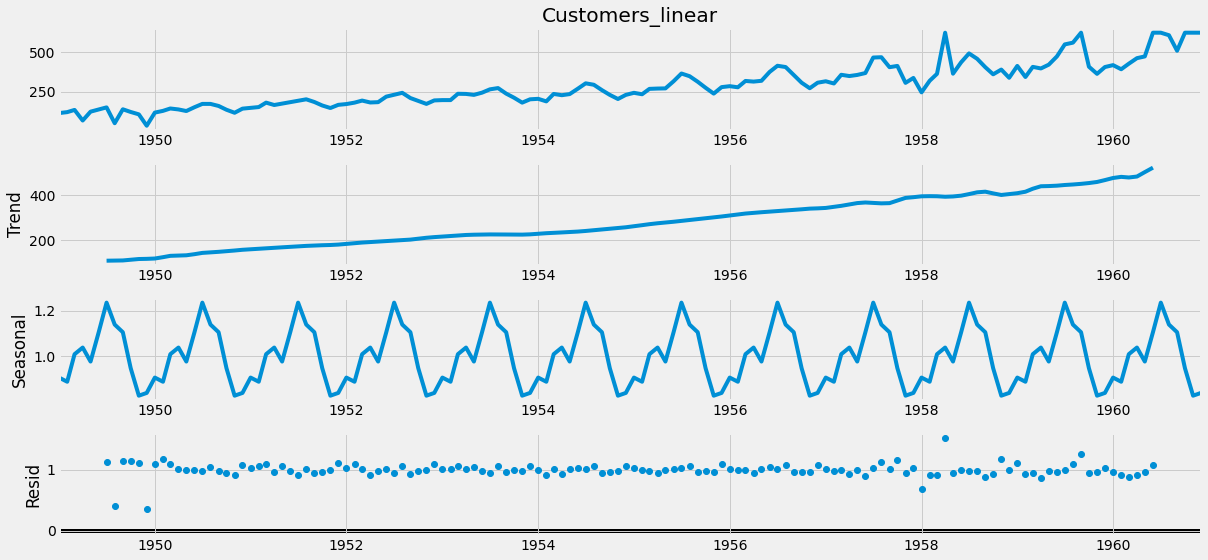

In [24]:
plt.rcParams['figure.figsize'] = (17,8)

decomposition = sm.tsa.seasonal_decompose(data['Customers_linear'], model='multiplicative')
decomposition.plot()
                                          
plt.show()

As there is no fixed pattern in residuals, therefore we can stick to this model

### Splitting Time Series Data : Cross Validation in Time Series

   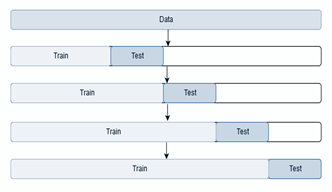

There are Two Types of Cross Validation Techniques commonly used for Time series data.

- One-Step Validation

    In one-step validation, the test data is exactly after the train data.
    
 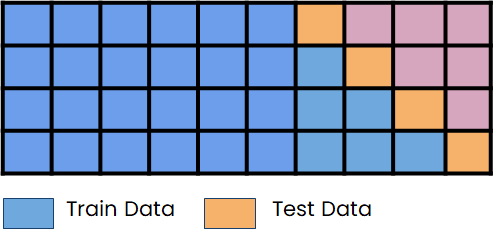
    

- Multi-Step Validation

    Multi-step validation is the same as one-step validation with the difference that in multi-step we do not consider the exact next point after train data points.
    
 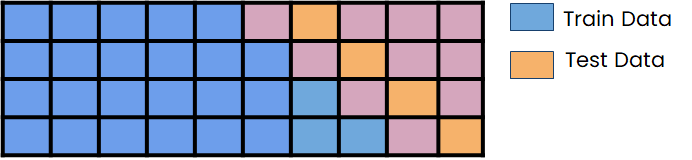
    
    

### Split train and test data

In [25]:
length_train = 115
train = data.iloc[:length_train,:]
test = data.iloc[length_train:,:]

In [26]:
print(train.shape)

(115, 3)


# Section : 3 Smoothing Techniques

Forecasting Methods :

1. Naive Forecasting Methods

        The naive method is the simplest method of all forecasting methods. It looks at the last historical data and extrapolates it for all the future values without adjusting or attempting to establish causal factors.

2. Simple Average Method

        In this method, we take the future predictions equal to the average of all the historical data.
        
3. Simple Moving Average Method

        In this method, we take the future predictions equal to the average of a moving window. A window can be a time period of 3 months, 6 months, 9 months or 1 year.

4. Simple Exponential Smoothing

        Assign higher weights to the most recent observations
  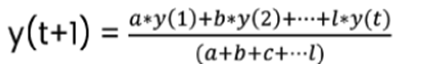
        Where a, b, c are the weights
        a<b<c….<l, l is the greatest of all.
        
        Level at the point t is:
    
            L(t) = α*y(t) + (1- α)*y(t-1)
        
        Where, 
        Y(t) denotes the recent observation
        L(t-1) denotes the previous observation
        and 0< α< 1
        
5. Holt Exponential Smoothing

        Holt’s exponential smoothing captures the level and trend of time series in the forecast.The forecast equation is a function of both level and trend.

            y(t+1) = l(t) +b(t) 

        Where l(t) is the level component and b(t) is the trend component.

        The trend component is calculated as shown
        
            b(t) = β(l(t) - l(t-1)) + (1-β)b(t-1) 

        Here beta β is the smoothing parameter for trend.

6. Holt Winter Exponential Smoothing
        
        This techniques forecasts based on level, trend and seasonality.
        The forecast equation for this method includes seasonality.

        y(t+1) = l(t)+b(t)+s(t+1-m) 
        Here m is the number of time a season repeats in a time period.

#### Naive Method

In [27]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers_linear'][length_train-1]

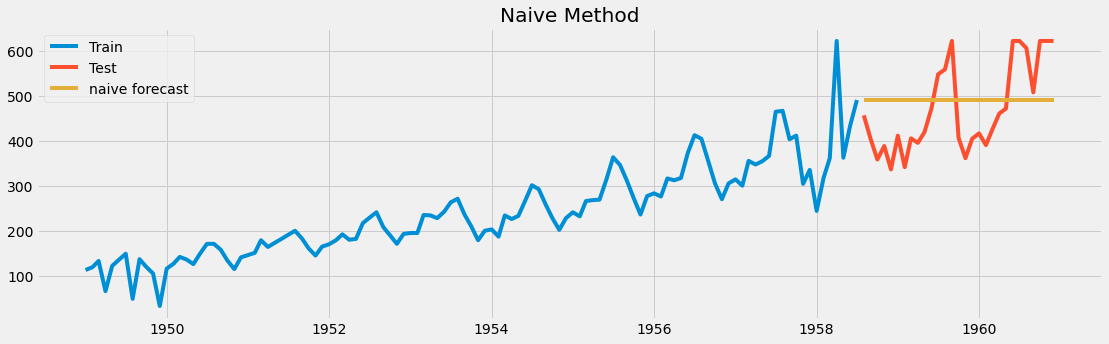

In [28]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

#### Simple Average Method

In [29]:
y_avg = test.copy()
y_avg['forecasted_avg'] = train['Customers_linear'].mean()

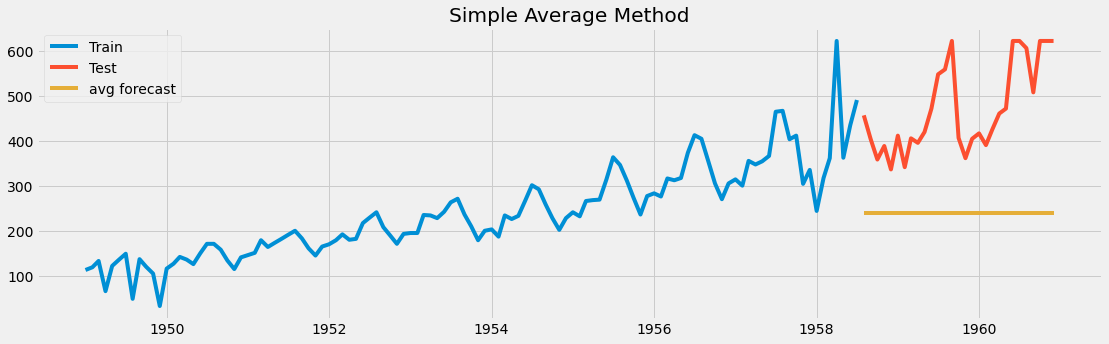

In [30]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'avg forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

#### Simple Moving Average Method

In [31]:
y_moving = data.copy()

window = 9
y_moving["moving_average_forecast"] = data['Customers_linear'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

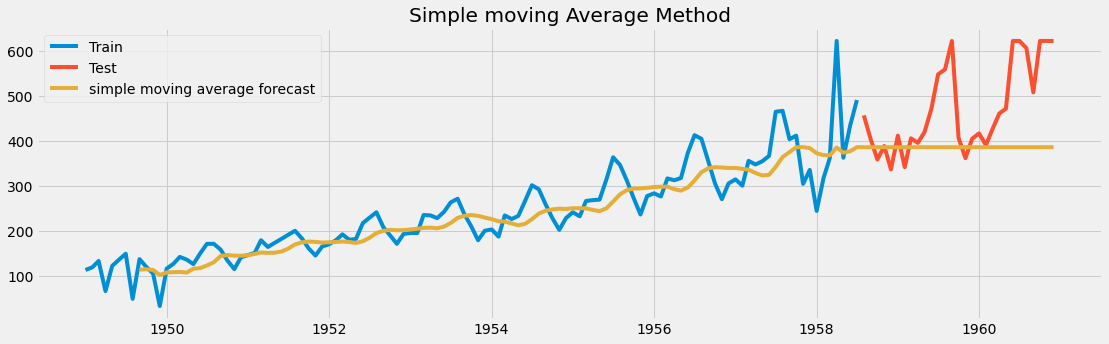

In [32]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple moving Average Method')
plt.show()

Observations

    1. The first value for Simple Moving Average Forecast begins after 10th month, when 9 months of data are available
    
    2. By reducing the window size, you can capture the seasonality better

#### Simple Exponential Smoothing

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [34]:
y_exp = test.copy()

model = SimpleExpSmoothing(train['Customers_linear'])
model_fit = model.fit(smoothing_level=0.2)
model_fit.params
y_exp['Exponential_forecast'] = model_fit.forecast(24)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


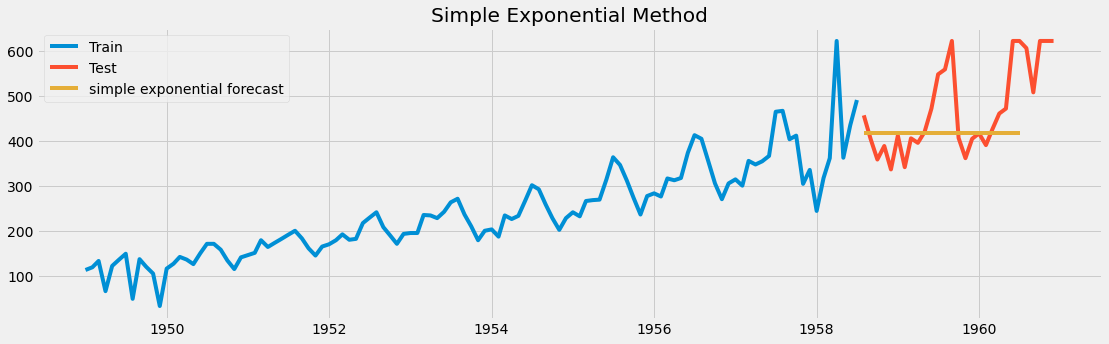

In [35]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

#### Holt Exponential Smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

y_holtexponential = test.copy()

model = ExponentialSmoothing(train['Customers_linear'], seasonal_periods = 12, trend = 'multiplicative')
model_fit = model.fit(smoothing_level=0.2, smoothing_slope = 0.04)
model_fit.params

y_exp['holtexponential_forecast'] = model_fit.forecast(24)


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


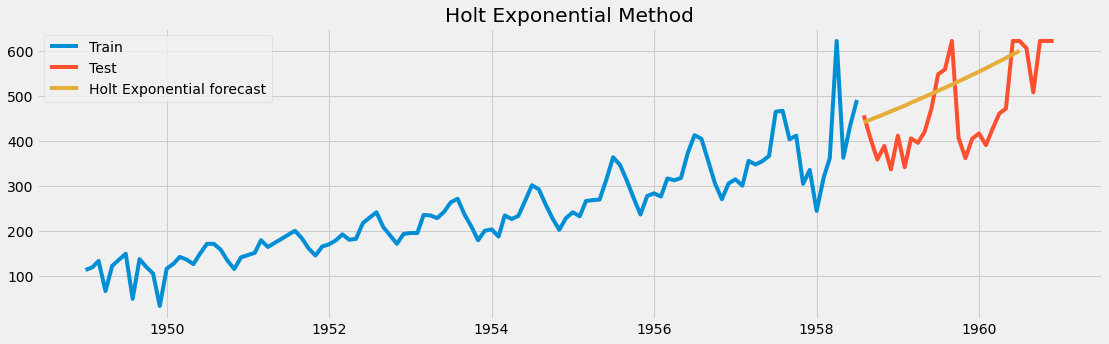

In [37]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_exp['holtexponential_forecast'], label = 'Holt Exponential forecast')

plt.legend()
plt.title('Holt Exponential Method')
plt.show()

Both the level and trend compnents of time series are getting captured here

#### Holt Winter's Exponential Smoothing

In [38]:
y_holtwinter = test.copy()

model = ExponentialSmoothing(train['Customers_linear'], 
                             seasonal_periods=12, 
                             trend='multiplicative', 
                             seasonal='additive') ## Seasonality has also been added
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.04)
model_fit.params

y_holtwinter['holtwinter_forecast'] = model_fit.forecast(12)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


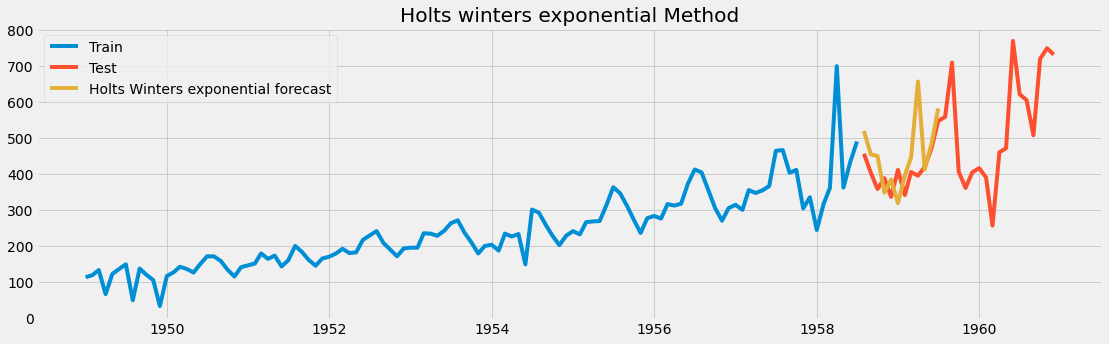

In [39]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['holtwinter_forecast'], label = 'Holts Winters exponential forecast')

plt.legend()
plt.title('Holts winters exponential Method')
plt.show()

This method captures all three components of Time Series data i.e., level, trend and seasonality

# Section 4 : Auto Regressive Models

- AutoRegressive Model predicts future behaviour based on past behaviour.
    - It is used when there is some correlation between values in a time series and the values that precede and succeed them.
    - In Autoregression we use a Regression model to formulate a time series problem. We make linear combination of past observations and use them to forecast future observations.


- Basic Assumptions
  - Stationarity
  - Autocorrelation

#### Stationarity
     The statistical properties of a process generating time series do not change over time
     
The statitical properties considered are :
    1. Mean
    2. Variance
    3. Covariance

The above three parameters should be constant for any time-series to be stationary

##### Time Series with Constant Mean

Here, the Blue line is the Time series and Red line is representing the “Mean”.

   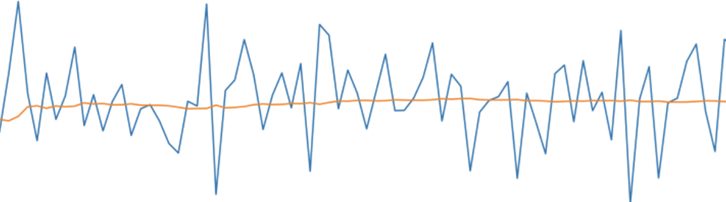   

#### Time Series with Constant Variance and Covariance

Variance is the spread between the data points present within a time series data set.

- The Green Line, Represents a Chart with Constant Variance.
- The Red Line Represents a Chart with non constant variance.


   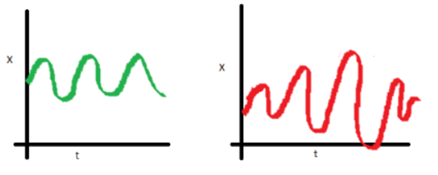

#### Why Stationarity?

    Stationary processes are easier to analyze and model because their statistical properties do not change over time

#### Checking for Statioinarity

There are two popular statistical tests using which we can test the stationarity of a time series. 
    - Augmented Dickey-Fuller(ADF) test.
        adfuller() function in statsmodel
        Returns the following outputs 
        
        - p-value,
        - test statisitic value,
        - number of lags considered,
        - critical value cutoffs
        
    - Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test.
        - p-value,
        - test statisitic value,
        - number of lags considered,
        - critical value cutoffs

ADF is a statistical significance test that means there is a hypothesis testing involved with a null and alternate hypothesis. We obtain  test statistic and p-value and then evaluate

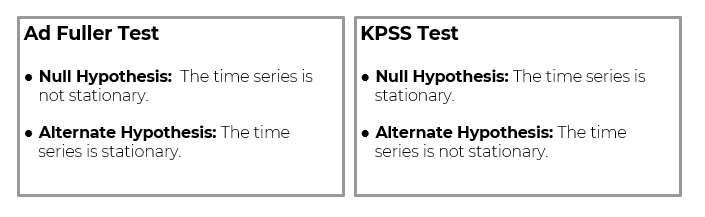

### Augmented Dickey-Fuller Test for Stationarity
Augmented Dickey Fuller test (ADF Test) is a common statistical test used to test whether a given Time series is stationary or not. It is one of the most commonly used statistical test when it comes to analyzing the stationary of a series.
* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Refer to this video to read more about ADF test https://www.youtube.com/watch?v=1opjnegd_hA

In [40]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['Customers_linear'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: 2.710560011283277
n_lags: 14
p-value: 0.9990875034273379
Critial Values:
   1%, -3.482087964046026
Critial Values:
   5%, -2.8842185101614626
Critial Values:
   10%, -2.578864381347275


Since p-value is greater than 0.05 therefore we fail to reject the null hypothesis

Null Hypothesis --> not stationary (This has not been rejected)

This means that time series is not stationary

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05

Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [41]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['Customers_linear'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 1.0654466813105485
p-value: 0.01
num lags: 14
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


Since p-value is less than 0.05, this means that time series is not stationary

## Converting Non Stationary Series to Stationary Series

There are two tools for converting a non-stationary series into a stationary series:

- Differencing

    Differencing means to calculate the difference between consecutive observations. 

 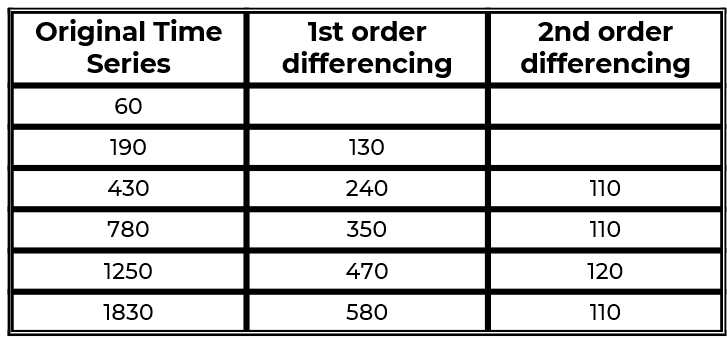

- Transformation
    
    Box Cox transformation transforms non-normal dependent variables into normal distribution. 
    The mathematical formula for box cox transformation is shown:

 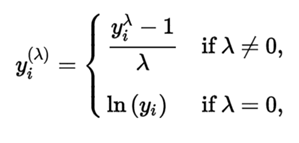

 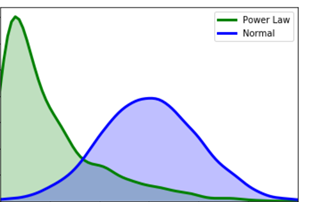
 
    y is the original time series.
    y(λ) is the transformed series.

To find the optimal value of lambda bet -5 and +5 is to minimize the variance of the time series.

### Box Cox Transformation
A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape. Normality is an important assumption for many statistical techniques; if your data isn't normal, applying a Box-Cox means that you are able to run a broader number of tests.

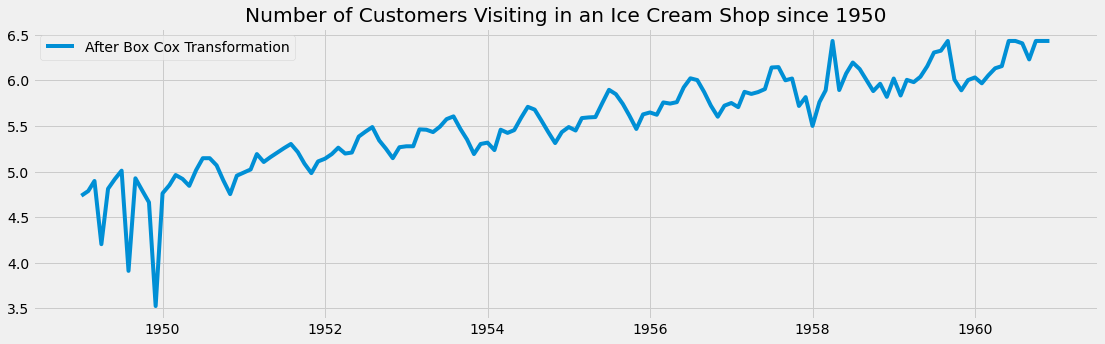

In [42]:
from scipy.stats import boxcox

data_boxcox = pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Number of Customers Visiting in an Ice Cream Shop since 1950")
plt.show()

The variance of the time-series has been stabilized, but we are still seeing an increasing trend, 
which we need to deal with by differencing

### Differencing

Differencing stabilises the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality. 

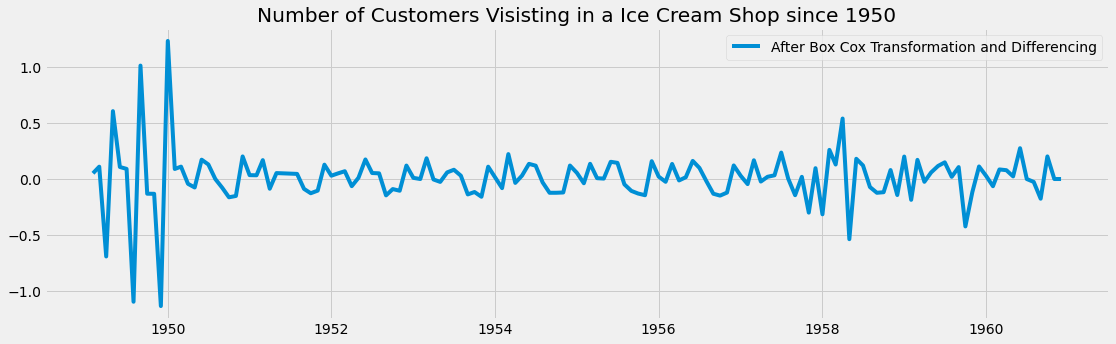

In [43]:
data_boxcox_difference= pd.Series(data_boxcox - data_boxcox.shift(), index=data.index)

##Drop the first few records where we are seeing null values
data_boxcox_difference.dropna(inplace=True)

plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

The trend of the time series has also become constant

### ADF Test

* p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
* p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [44]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data_boxcox_difference, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[2]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

ADF Statistic: -11.770270241136213
n_lags: 10
p-value: 1.0941618541928794e-21
Critial Values:
   1%, -3.4808880719210005
Critial Values:
   5%, -2.8836966192225284
Critial Values:
   10%, -2.5785857598714417


p < 0.05, therefore the series is stationary

### KPSS Test

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05

Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [45]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data_boxcox_difference)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

KPSS Statistic: 0.05598972890922393
p-value: 0.1
num lags: 14
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


p > 0.05, therefore the time-series is stationary

## Auto-Correlation

- Autocorrelation is the representation of the degree of similarity between a given time series and the lagged version of itself over successive time intervals.
- It helps us to know a variable is influenced by its own lagged values.


#### Auto Correleation Function (ACF)
ACF is an (complete) auto-correlation function which gives us values of auto-correlation of any series with its lagged values. 

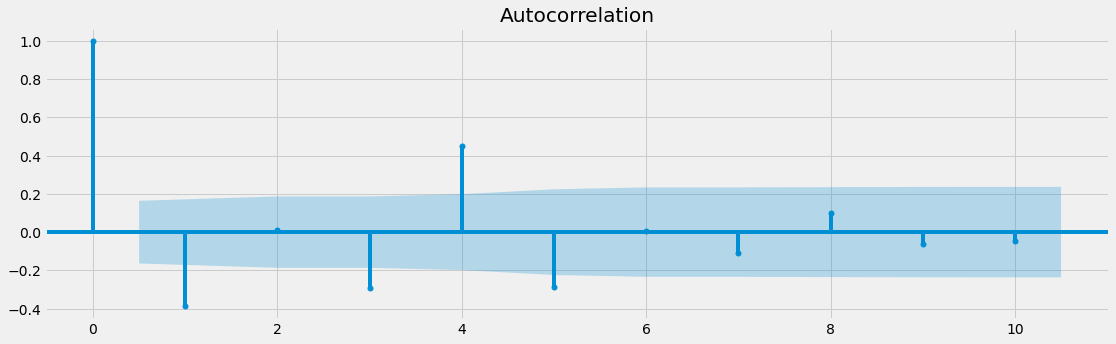

In [46]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf

##Specified the logs as 10
plot_acf(data_boxcox_difference, ax=plt.gca(), lags=10)
plt.show()

Beyond the band, significant correaltion

Within the band, insignificant correlation

4 significant correlation

## Partial Auto Correleation Function (PACF)
Partial autocorrelation function (PACF) gives the partial correlation of a stationary time series with its own lagged values, regressed the values of the time series at all shorter lags. It contrasts with the autocorrelation function, which does not control for other lags.

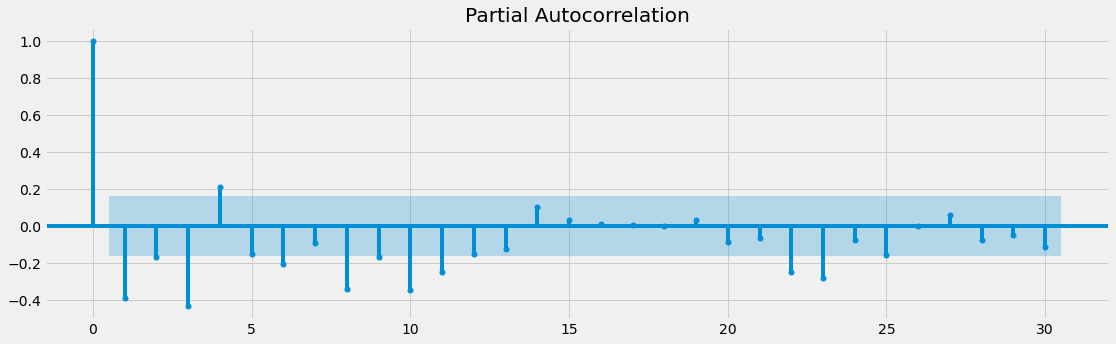

In [47]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data_boxcox_difference, ax=plt.gca(), lags=30)
plt.show()

Beyond the band, significant correaltion

Within the band, insignificant correlation

9 significant correlations

### Simple Auto Regressive Model

Regressive model is used for forecasting future observations based on the past observations.
    
    Model has a parameter p.
    p  is the maximum number of lags.
    
Suppose, the highest order lag is 10.

2nd , 4th and 6th have significant correlation with future observations.

Model equation would be:-
    
    y = β0 + β1*y(t-2) + β2*y(t-4) + β3*y(t-6)

y(t-2), y(t-4) and y(t-6) are the independent variables.



### Split the train and Test Data

In [48]:
##We know there are 140 records, and I want to take only the first 115 out of the same
length_train = 115

train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]

## Simple Auto Regressive Model
Regressive model is forecasting the future observations as a linear regression of one or more past observations.

This model has a parameter called “p” which is the lag order p that means p is the maximum number of lags that we consider in order to forecast the future observations.

Autoregressive model equation would be

y(t) = β_0 + β_1 y(t-2) + β_2 y(t-4) + β_3 y(t-6)

#### ARIMA models function has 3 parts to it Auto Regressive, Inverse and Moving Averages
p = lag order

In [49]:
from statsmodels.tsa.arima_model import ARIMA

model_ar = ARIMA(train_data_boxcox_difference, order=(1,0,0))
model_fit = model_ar.fit()
print(model_fit.params)

const      0.012440
ar.L1.y   -0.398536
dtype: float64


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const = β_0

ar.L1.y = β_1

Also, please note we have applied differenceing and box cox transformation on the time-series which we will have to undo to get he orignial time series

### Recover Original Time Series

In [50]:
y_ar_new = data_boxcox_difference.copy()

y_ar_new['ar_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())
## We had used differencing to revert this we will use cummulative sum 
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox_difference'].cumsum()
## We will add the first row as well
y_ar_new['ar_forecast_boxcox'] = y_ar_new['ar_forecast_boxcox'].add(data_boxcox[0])
## We will re - transform using exponential function
y_ar_new['ar_forecast'] = np.exp(y_ar_new['ar_forecast_boxcox'])

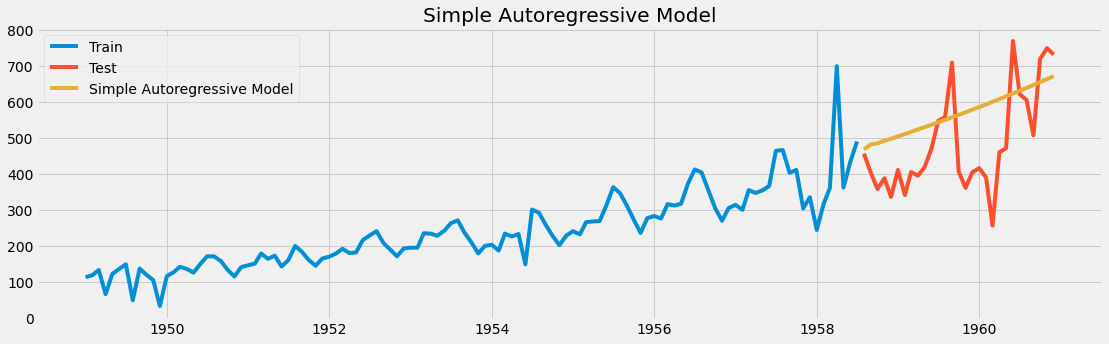

In [51]:
plt.rcParams['figure.figsize'] = (17,5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_ar_new['ar_forecast'][test.index.min():], label = 'Simple Autoregressive Model')

plt.legend()
plt.title('Simple Autoregressive Model')
plt.show()

# y_ar_new['ar_forecast']

Although the graph is not capturing the seasonality of the time-series it is capturing the trend very well

### Moving Average Model

In Moving Average Model, we consider the past forecasted errors to forecast the future values

The Moving average model has a parameter called “q” which is the size of the Moving average window over which linear combinations of errors are calculated.

In Moving Average Model, we consider the past forecasted errors to forecast the future values.

The moving average model has a parameter called “q” which is the size of the moving average window over which linear combinations of errors are calculated.

    The mathematical equation is:-

    y(t) = µ + φ(k)*ε(t-k)

    µ is the mean of the series

    ε(t-k) is the past forecasted value

    φ(k) is the weight associated with error value


In [52]:
#from statsmodels.tsa.arima_model import ARIMA

model_ma = ARIMA(train_data_boxcox_difference, order=(0,0,7))
model_fit = model_ma.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.012553
ma.L1.y   -0.539879
ma.L2.y   -0.200034
ma.L3.y   -0.146816
ma.L4.y    0.627896
ma.L5.y   -0.310058
ma.L6.y   -0.113329
ma.L7.y   -0.317780
dtype: float64


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [53]:
y_ma_new = data_boxcox_difference.copy()
y_ma_new['ma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                              data_boxcox_difference.index.max())
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox_difference'].cumsum()
y_ma_new['ma_forecast_boxcox'] = y_ma_new['ma_forecast_boxcox'].add(data_boxcox[0])
y_ma_new['ma_forecast'] = np.exp(y_ma_new['ma_forecast_boxcox'])

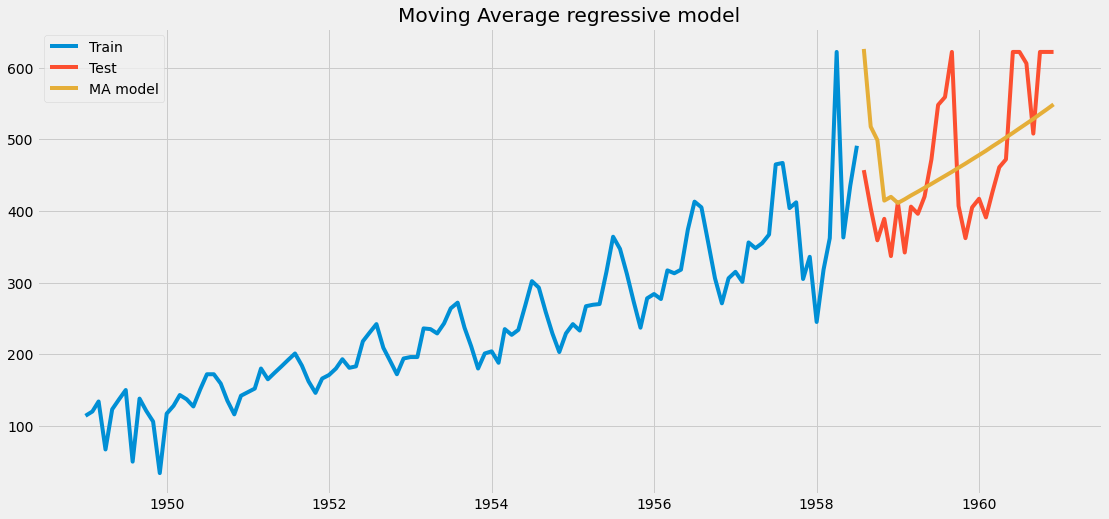

In [54]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_ma_new['ma_forecast'][test.index.min():], label = 'MA model')

plt.legend()
plt.title('Moving Average regressive model')
plt.show()

### ARMA Model : AutoRegressive + Moving Average Models

ARMA Model combines both AR and MA model.

It takes into account one or more past observations as well as the past errors.

The ARMA model contains two parameters p and q

        p is the highest lag in the time series
        q is the number of past errors included

Model Equation

    y(t) = ß0 + ß1*y(t-1) + Ψ1𝛆(t-1)


        y(t) is the Future Observation
        ß0 is the Intercept
        y(t-1) is the lag value
        ß1 is the weight associated
        Ψ1 is the weight associated with error
        𝛆(t-1) is the error Value.


In [55]:
from statsmodels.tsa.arima_model import ARIMA

model_arma = ARIMA(train_data_boxcox_difference, order=(1,0,5))
model_fit = model_arma.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.012067
ar.L1.y   -0.401650
ma.L1.y   -0.207803
ma.L2.y   -0.514186
ma.L3.y   -0.307993
ma.L4.y    0.314265
ma.L5.y   -0.284283
dtype: float64


In [56]:
y_arma_new = data_boxcox_difference.copy()
y_arma_new['arma_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                  data_boxcox_difference.index.max())
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox_difference'].cumsum()
y_arma_new['arma_forecast_boxcox'] = y_arma_new['arma_forecast_boxcox'].add(data_boxcox[0])
y_arma_new['arma_forecast'] = np.exp(y_arma_new['arma_forecast_boxcox'])

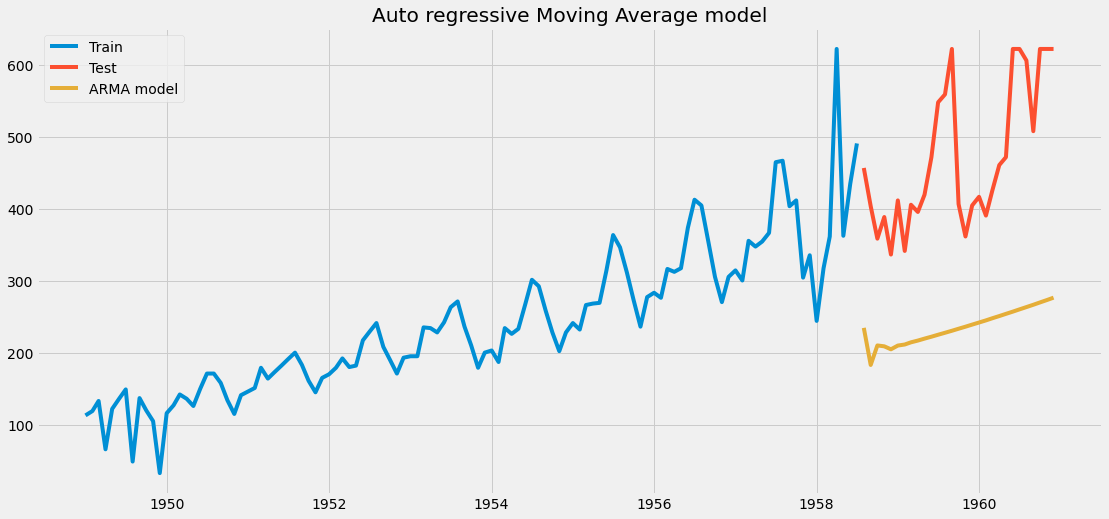

In [57]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arma_new['arma_forecast'][test.index.min():], label = 'ARMA model')

plt.legend()
plt.title('Auto regressive Moving Average model')
plt.show()

### ARIMA Model : AutoRegressive + Integrated + Moving Average Models


Difference Between ARIMA and ARMA

     - ARMA : We apply Box-Cox and differencing to ensure that time-series can be made stationary and auto-correlated
     
     - ARIMA : We need to apply only Box-Cox, model will apply differenccing on its own



We have three parameters to be used p, d  and  q.

    - p is the highest lag in the model
    - d is the degree of differencing to make the series stationary
    - q is the number of past errors terms included.

▲y(t) = θ1 *▲y(t-1) + φ1*𝛆(t-1) + 𝛆(t)
    
    Where, ▲y(t-1) = ▲y(t+1) - y(t) 

    θ1 is the weight associated 
    𝛆(t-1) is the error term
    φ1 is the weight associated with error term



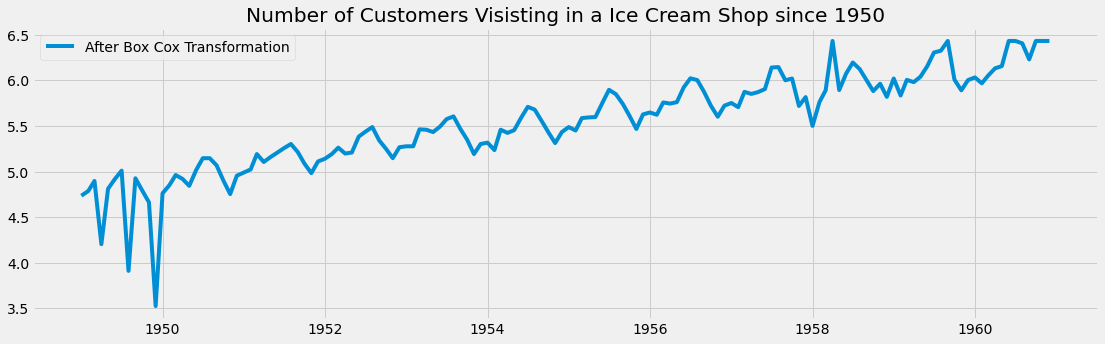

In [58]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Customers_linear'],lmbda=0),index=data.index)
plt.plot(data_boxcox, label="After Box Cox Transformation")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

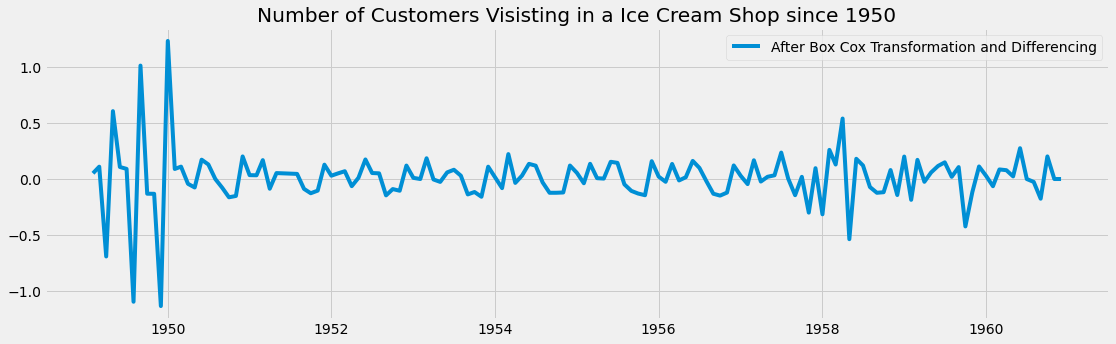

In [59]:
data_boxcox_difference= pd.Series(data_boxcox-data_boxcox.shift(), index=data.index)
data_boxcox_difference.dropna(inplace=True)
plt.plot(data_boxcox_difference, label="After Box Cox Transformation and Differencing")
plt.legend()
plt.title("Number of Customers Visisting in a Ice Cream Shop since 1950")
plt.show()

In [60]:
length_train = 115
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,:]

In [61]:
train_data_boxcox = data_boxcox[:length_train]
test_data_boxcox = data_boxcox[length_train:]
train_data_boxcox_difference = data_boxcox_difference[:length_train-1]
test_data_boxcox_difference = data_boxcox_difference[length_train-1:]  

In [62]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train_data_boxcox, order=(4,1,2))
model_fit = model.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const        0.012247
ar.L1.D.y   -0.134973
ar.L2.D.y    0.140722
ar.L3.D.y   -0.176071
ar.L4.D.y    0.354689
ma.L1.D.y   -0.486212
ma.L2.D.y   -0.513788
dtype: float64


In [63]:
y_arima_new = data_boxcox_difference.copy()
y_arima_new['arima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                    data_boxcox_difference.index.max())
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox_difference'].cumsum()
y_arima_new['arima_forecast_boxcox'] = y_arima_new['arima_forecast_boxcox'].add(data_boxcox[0])
y_arima_new['arima_forecast'] = np.exp(y_arima_new['arima_forecast_boxcox'])

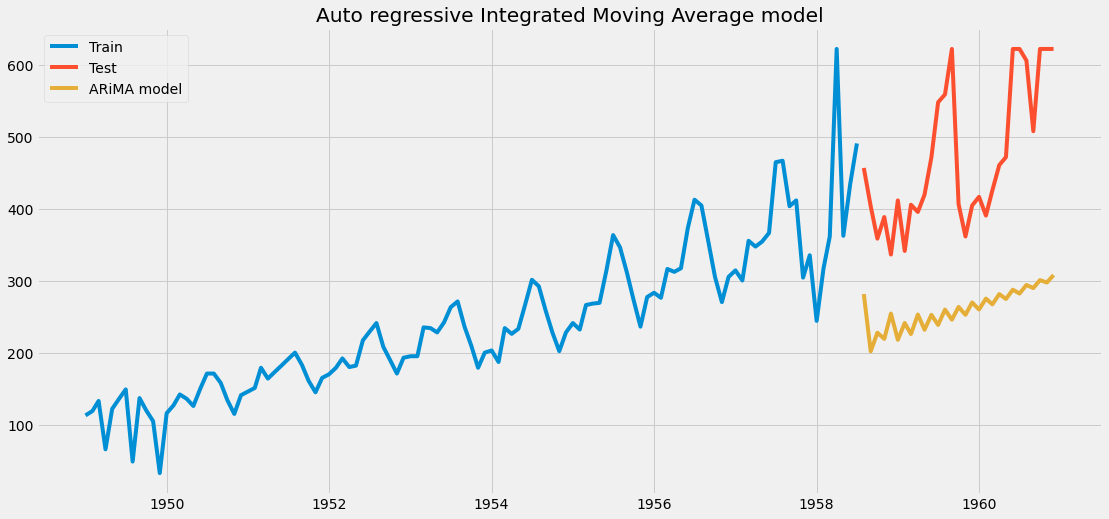

In [64]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_arima_new['arima_forecast'][test.index.min():], label = 'ARiMA model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average model')
plt.show()

The model is able to capture Trends, but does not capture properly the seasonality

# Seasonal Auto Regressive Integrated Moving Average Model (SARIMA)

SARIMA model brings all the features of ARIMA model along with the seasonality.

The key elements performed in SARIMA are:-

1. The time series is differenced to make it stationary.

2. The SARIMA equation is a linear combination of past observations and past errors.

3. Seasonal differencing is performed on the time series.

4. SARIMA models future seasonality as a linear combination of past seasonality observations and past seasonality errors.


The SARIMA model has the following parameters p, q, d, m

    m - the number of time steps for a single seasonal period
    P -  the seasonal autoregressive order 0<=P<=4
    D - the seasonal difference order. D=0, 1, 2
    Q - the seasonal moving average order. 0<=Q<=4
    
SARIMA contains a total of 7 parameters p, q, d, m, P, D, and Q

p --> AutoCorrelation function

q --> Partial Autocorrelation Function

d --> ADF and KPSS test

For P, Q, and D we use GridSearch


In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox_difference, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1     -0.577395
ma.L1     -0.998486
ar.S.L6   -0.734250
ma.S.L6   -0.540033
sigma2     0.049807
dtype: float64


In [66]:
y_sarima_new = data_boxcox_difference.copy()
y_sarima_new['sarima_forecast_boxcox_difference'] = model_fit.predict(data_boxcox_difference.index.min(),
                                                                      data_boxcox_difference.index.max())
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox_difference'].cumsum()
y_sarima_new['sarima_forecast_boxcox'] = y_sarima_new['sarima_forecast_boxcox'].add(data_boxcox[0])
y_sarima_new['sarima_forecast'] = np.exp(y_sarima_new['sarima_forecast_boxcox'])

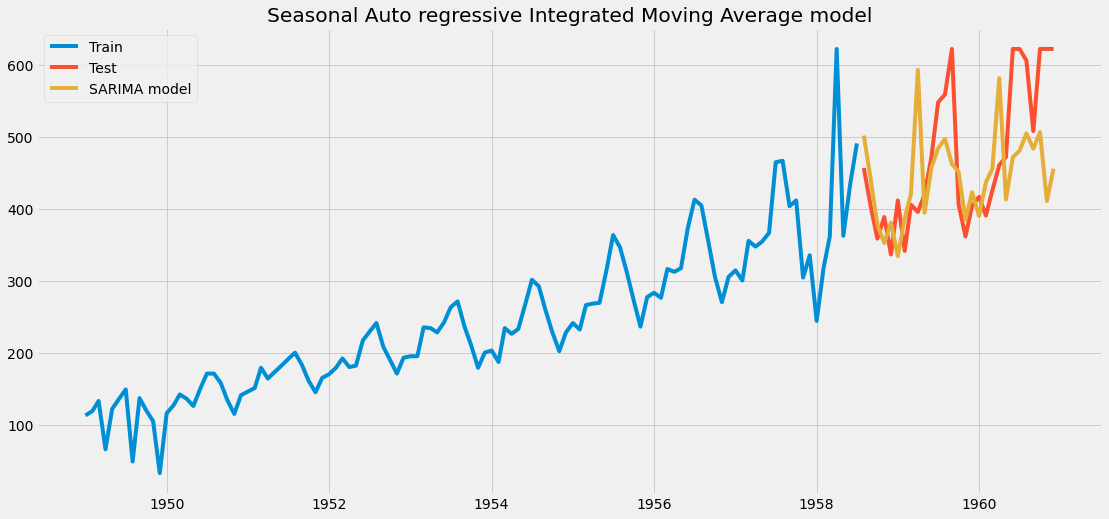

In [67]:
plt.figure(figsize=(17,8))

plt.plot(train['Customers_linear'], label = 'Train')
plt.plot(test['Customers_linear'], label = 'Test')
plt.plot(y_sarima_new['sarima_forecast'][test.index.min():], label = 'SARIMA model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average model')
plt.show()

## Section 7 : ARIMAX and SARIMAX models

ARIMAX model works similar to ARIMA Model.

ARIMAX model has an additional external variable.

    p, d and q  are the parameters of ARIMAX Model.
    p and q can be determined by Autocorrelation and Partial Correlation functions.
    d can be determined by level of stationarity in the data.
    
ARIMAX(2, 1, 1)

    2nd order Autoregressive model
    1st order moving average component
    Series has been differenced once to induce stationarity.




In [68]:
data = pd.read_csv("Climate.csv")

In [69]:
data['date'] = pd.to_datetime(data['date'],format="%Y-%m")
data = data.set_index('date')

In [70]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


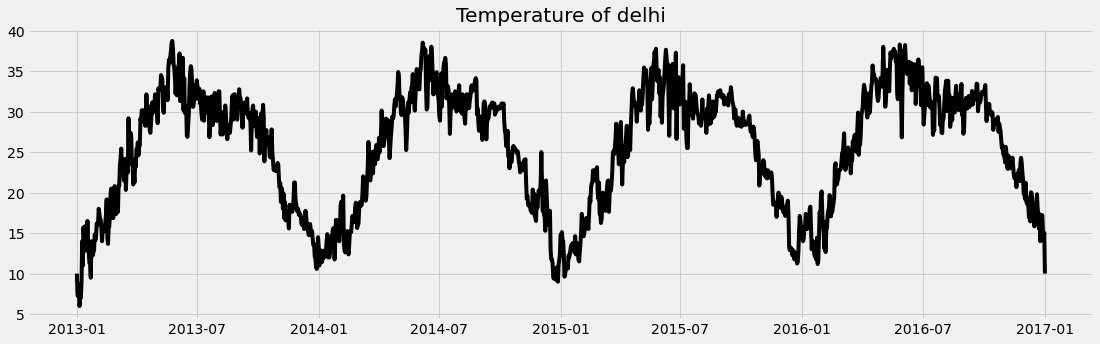

In [71]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data['meantemp'],color='black')
plt.title("Temperature of delhi")
plt.show()

## Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
The Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend, or is non-stationary due to a unit root. A stationary time series is one where statistical properties — like the mean and variance — are constant over time.

For KPSS test,

The Null Hypothesis : The series is stationary when p-value >0.05 Alternate Hypothesis: The series is not stationary when p-value <= 0.5

In [72]:
#loading kpss from statsmodel
from statsmodels.tsa.stattools import kpss

result = kpss(data['meantemp'])
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(f'num lags: {result[2]}')
print('Critial Values:')
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

KPSS Statistic: 0.1948270141059301
p-value: 0.1
num lags: 24
Critial Values:
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


### Autocorrelation Function

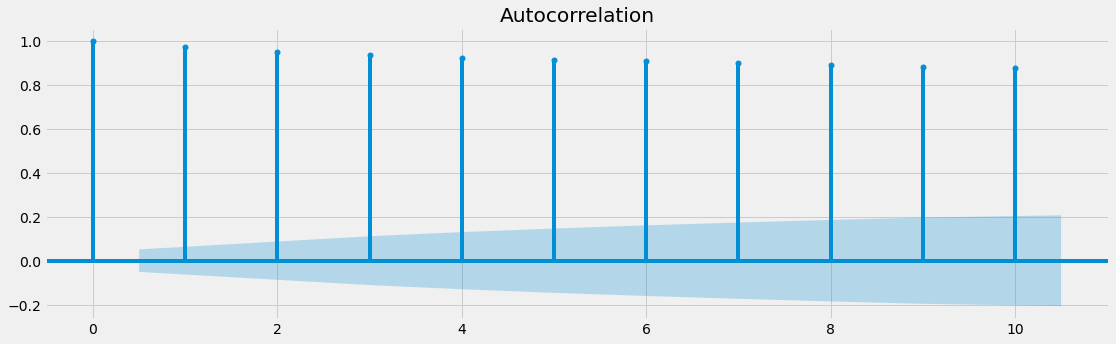

In [73]:
#Loading and plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['meantemp'], ax=plt.gca(), lags=10)
plt.show()

### Partial Correlation Function

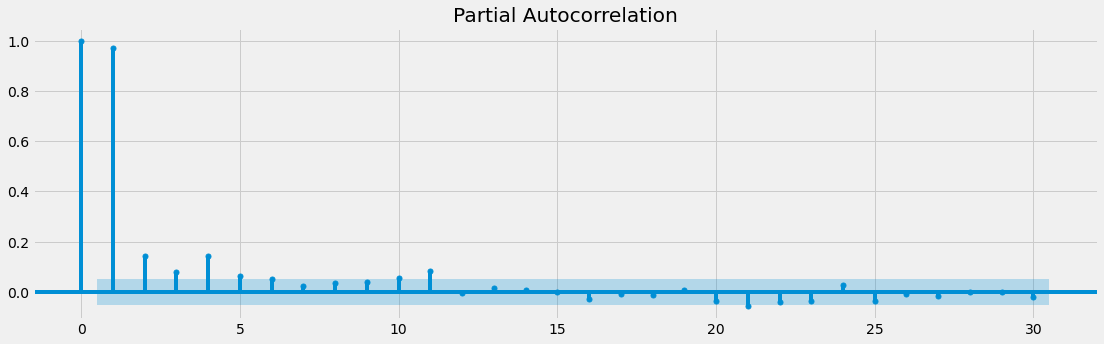

In [74]:
#Loading and plottin pacf
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['meantemp'], ax=plt.gca(), lags=30)
plt.show()

## Splitting Test and Train Data

In [75]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [76]:
train.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


### ARIMAX Model

In [77]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['meantemp'], order=(10,0,6), exog= train['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const              30.921431
humidity           -0.134268
ar.L1.meantemp      1.049632
ar.L2.meantemp      1.607585
ar.L3.meantemp     -1.506717
ar.L4.meantemp     -1.573225
ar.L5.meantemp      1.349506
ar.L6.meantemp      0.541842
ar.L7.meantemp     -0.704723
ar.L8.meantemp      0.261608
ar.L9.meantemp      0.047466
ar.L10.meantemp    -0.074324
ma.L1.meantemp     -0.150673
ma.L2.meantemp     -1.841455
ma.L3.meantemp     -0.167185
ma.L4.meantemp      1.766392
ma.L5.meantemp      0.260088
ma.L6.meantemp     -0.711572
dtype: float64


C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [78]:
y_arimax = data.copy()
y_arimax['arimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                test['meantemp'].index.max(),
                                                exog= test['humidity'])

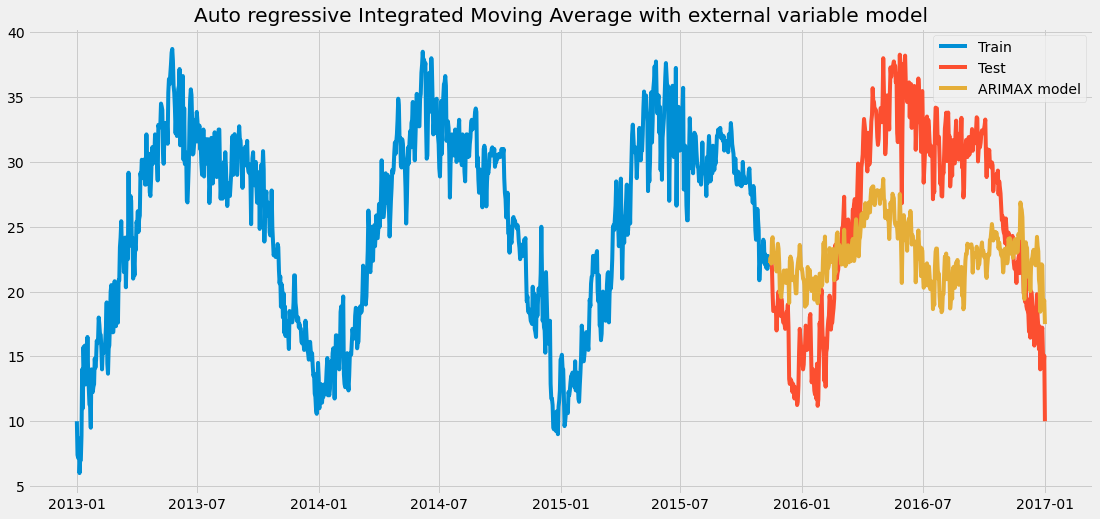

In [79]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][test['meantemp'].index.min():], 
         label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()

Try this another model by changing the external variable

### Changing the Exogenous Variable from Humidity to Wind

In [84]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train['meantemp'], order=(1,0,3), exog= train['wind_speed'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


const             22.692710
wind_speed         0.029358
ar.L1.meantemp     0.994478
ma.L1.meantemp    -0.230193
ma.L2.meantemp    -0.116915
ma.L3.meantemp    -0.141996
dtype: float64


In [85]:
y_arimax = data.copy()
y_arimax['arimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                test['meantemp'].index.max(),
                                                exog= test['wind_speed'])

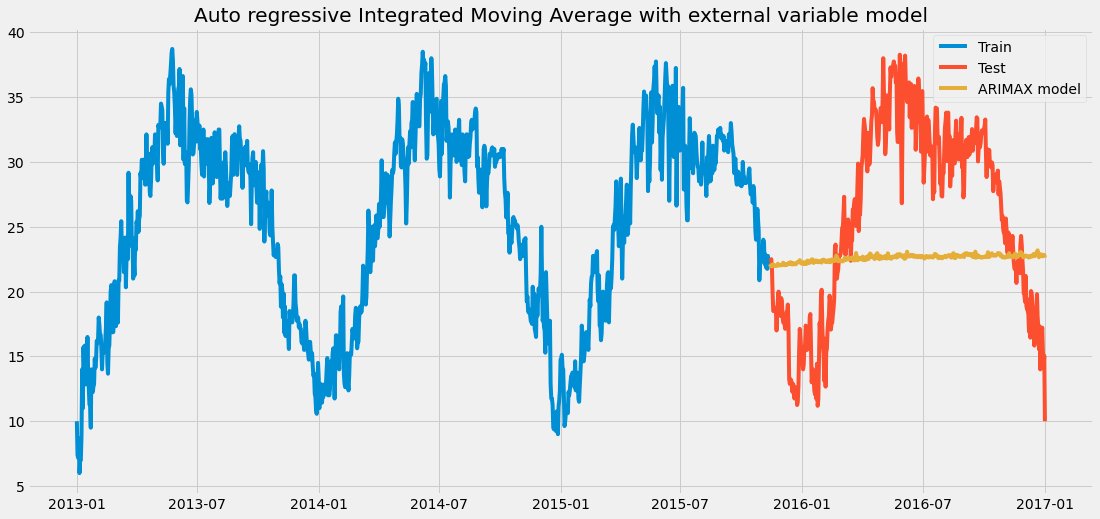

In [86]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_arimax['arimax_forecast'][test['meantemp'].index.min():], 
         label = 'ARIMAX model')

plt.legend()
plt.title('Auto regressive Integrated Moving Average with external variable model')
plt.show()

# SARIMAX Model

The SARIMAX model is the model which along with the seasonal and non-seasonal components, also models an external variable.

    SARIMAX(p, d, q)(P, D, Q, s)
    
- SARIMAX Model has all the features of SARIMA.

- Performing differencing to make the time series stationary.

- Model future observations as the linear regression of past observations and past errors.


## Parameters
  
  p, q, d, m, P, D, Q


- The SARIMAX model has an extra term αx(t) which indicates the external variable and α  denotes the weight associated with it.




## Key Elements of SARIMAX Model

- Performs seasonal differencing to make data stationary over the season.
- Models future observations as a linear regression of past observations and past seasonal errors.
- Model future observations as a linear regression of the external variable.



In [87]:
length_train = 1046
train = data.iloc[:length_train,:]
test=data.iloc[length_train:,: ]

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train['meantemp'], order=(7,0,3), seasonal_order=(2,1,1,12), exog =train['humidity'])
model_fit = model.fit()
print(model_fit.params)

C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\asus\anaconda3\envs\new\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


humidity   -0.130804
ar.L1      -1.257974
ar.L2      -0.176504
ar.L3       0.857326
ar.L4       0.770079
ar.L5       0.255340
ar.L6       0.374064
ar.L7       0.177489
ma.L1       2.179300
ma.L2       2.108154
ma.L3       0.894453
ar.S.L12    0.035444
ar.S.L24    0.031403
ma.S.L12   -0.982798
sigma2      1.575124
dtype: float64


In [89]:
y_sarimax = data.copy()
y_sarimax['sarimax_forecast'] = model_fit.predict(test['meantemp'].index.min(),
                                                  test['meantemp'].index.max(),
                                                  exog= test['humidity'])

## Plotting Train, Test and Forecasted data

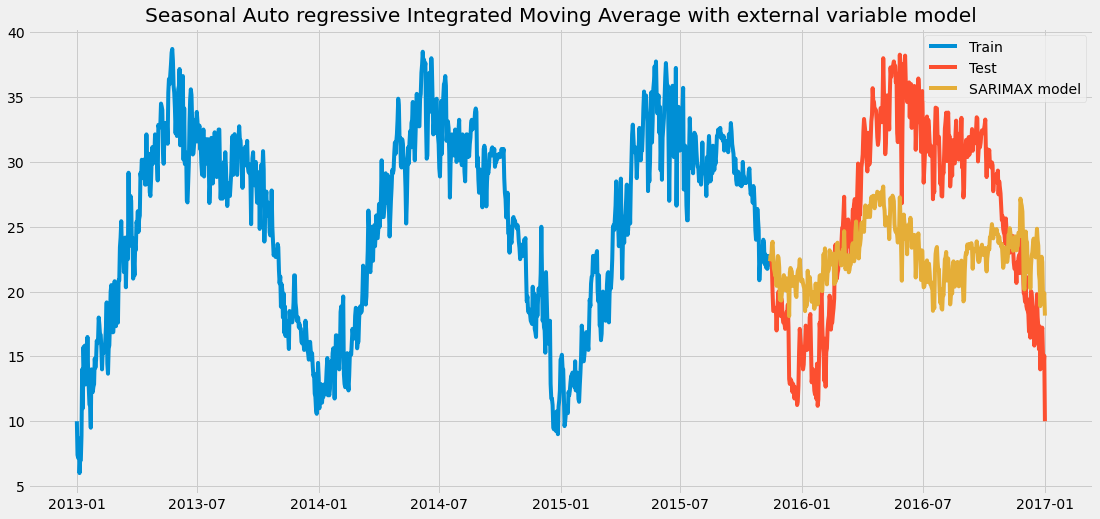

In [91]:
plt.figure(figsize=(17,8))

plt.plot(train['meantemp'], label = 'Train')
plt.plot(test['meantemp'], label = 'Test')
plt.plot(y_sarimax['sarimax_forecast'][test['meantemp'].index.min():], label = 'SARIMAX model')

plt.legend()
plt.title('Seasonal Auto regressive Integrated Moving Average with external variable model')
plt.show()

# Evaluating Model Performance

### Mean Forecast Error

- Mean Forecast Error shows deviation of the forecast from the actual demand.
- This is the mean of the sum of all the differences between the actual values and forecasted values.

        Let’s consider 10 data points 
        -2, -4, 3, 8, -3, -8, 1, -1, 5, -5
        Sum of errors = 0


### Mean Absolute Error

Mean Absolute Error takes the absolute values of the differences between actual values and forecasted values.

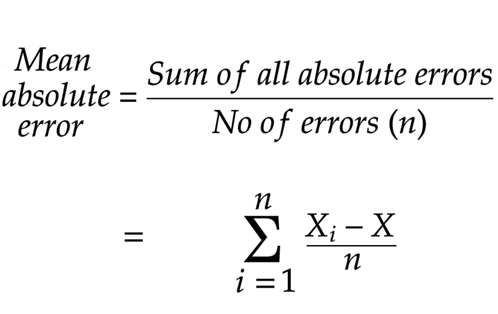

### Mean Absolute Percentage Error

Mean Absolute Percentage Error calculates the percentage of mean absolute error to get a clear idea of how much the forecasted values deviates from the actual values.

Mean Absolute Percentage Error (MAPE) calculates tehe percentage error of Mean Absolute Error (MAE)


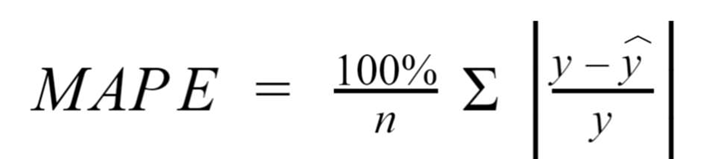

### Root Mean Square Error

Root Mean Square Error is equal to the root of the Mean Square error in order to bring error value to the same dimension.

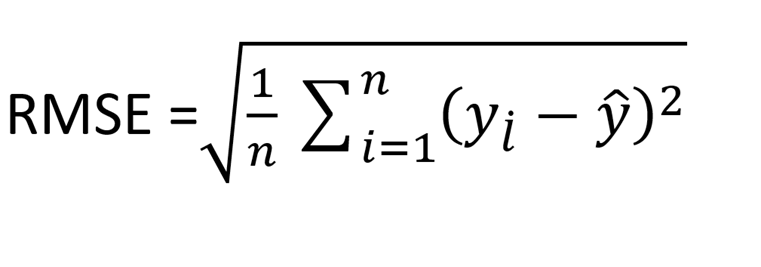

In [93]:
data = pd.read_csv('Customers_in_a_Shop.csv',header=None)
data.columns = ['Date','Customers']
data['Date'] = pd.to_datetime(data['Date'],format="%Y-%m")
data = data.set_index('Date')

#Shape of the dataset
data.shape

(144, 1)

### Missing Values

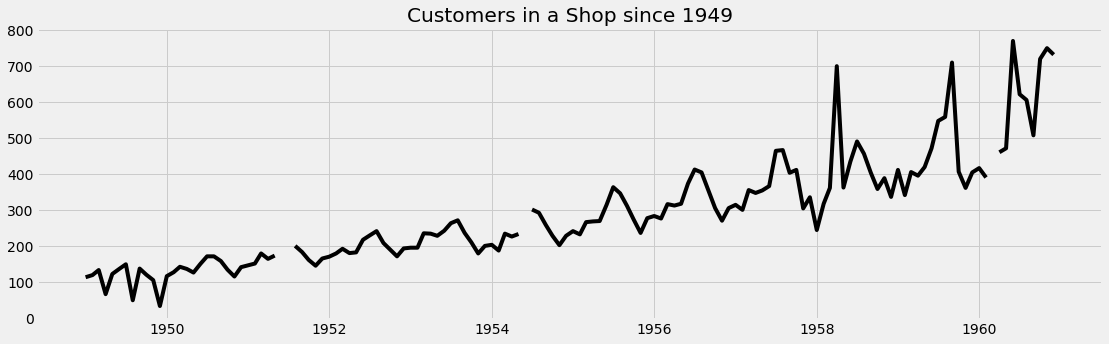

In [94]:
plt.rcParams['figure.figsize']=(17,5)
plt.plot(data,color='black')
plt.title("Customers in a Shop since 1949")
plt.show()

In [ ]:
Linear Interpolation

In [ ]:
plt.rcParams['figure.figsize']=(17,5)
data['Customers_linear']=data['Customers'].interpolate(method='linear')
plt.plot(data['Customers_linear'],color='black')
plt.title("Linear Interpolation of Missing Values")
plt.show()